# Kernels en SVM

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network

import mlutils
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
def load_dataset_disks(size, seed=39):    
    def get_sample_disk(from_, to, size):
        length = np.random.uniform(from_, to, size)
        angle = np.pi * np.random.uniform(0, 2, size)
        x = length * np.cos(angle)
        y = length * np.sin(angle)
        return np.array(list(zip(x,y)))

    np.random.seed(seed)
    size1 = int(size / 2)
    size2 = size - size1
    X = np.concatenate((get_sample_disk(0, 1, size1), get_sample_disk(1, 2, size2)))
    Y = np.concatenate((np.ones(size1), -np.ones(size2)))
    return X, Y

# SVMs (kernels)

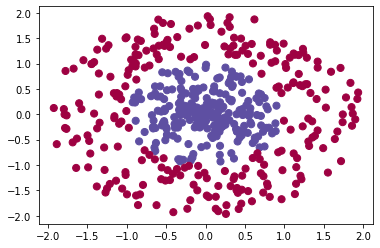

In [3]:
X, Y = load_dataset_disks(500)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

### Let's try to use some kernels

In [4]:
clf = sklearn.svm.SVC(kernel="sigmoid", gamma="auto")
clf.fit(X, Y)

SVC(gamma='auto', kernel='sigmoid')

Accuracy: 65 


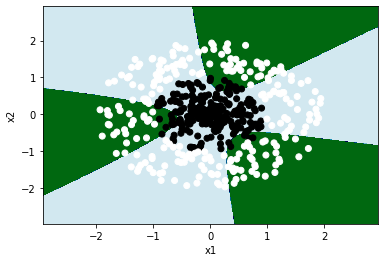

In [5]:
mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

In [6]:
clf = sklearn.svm.SVC(kernel="rbf", gamma="auto")
clf.fit(X, Y)

SVC(gamma='auto')

Accuracy: 99 


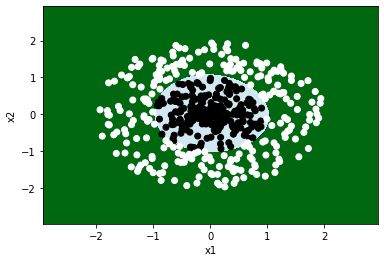

In [7]:
mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

In [8]:
clf = sklearn.svm.SVC(kernel="poly", gamma="auto")
clf.fit(X, Y);

Accuracy: 58 


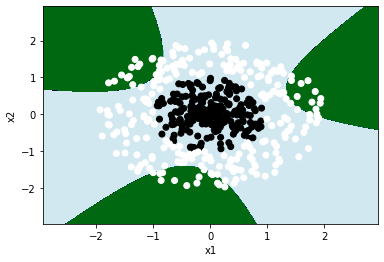

In [9]:
mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

Un ejemplo interesante de uso de SVM: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification

## Usemos conjunto de entrenamiento y de prueba

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Dividimos el conjunto de datos

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

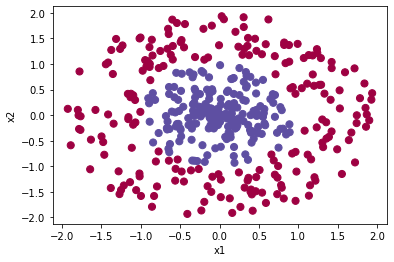

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

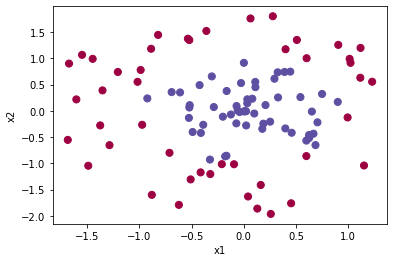

In [13]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Reporte de clasificación usnado el conjunto de datos de prueba

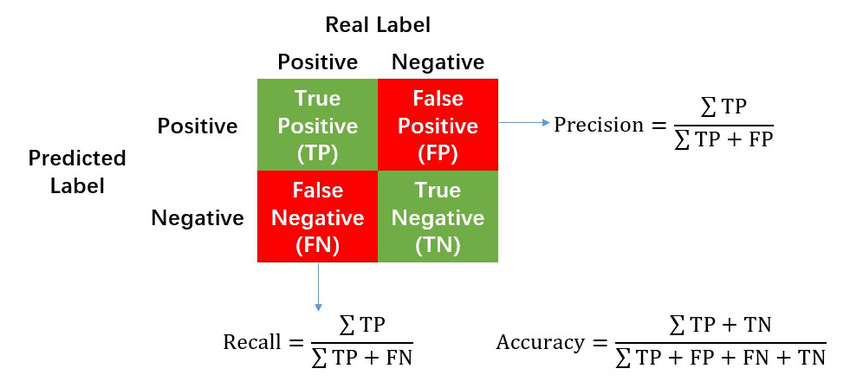

In [14]:
from IPython.display import Image
Image('./images/confusion_matrix.png',width=500) 

              precision    recall  f1-score   support

        -1.0       0.62      0.33      0.43        45
         1.0       0.61      0.84      0.70        55

    accuracy                           0.61       100
   macro avg       0.62      0.58      0.57       100
weighted avg       0.61      0.61      0.58       100



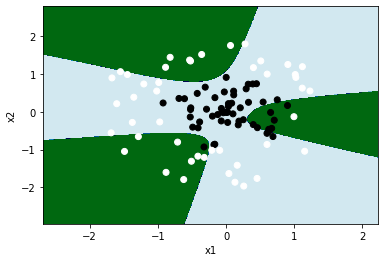

In [15]:
clf = sklearn.svm.SVC(kernel="sigmoid", gamma="auto").fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

mlutils.plot_decision_boundary(lambda x: clf.predict(x), X_test.T, y_test.T)

              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99        45
         1.0       0.98      1.00      0.99        55

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



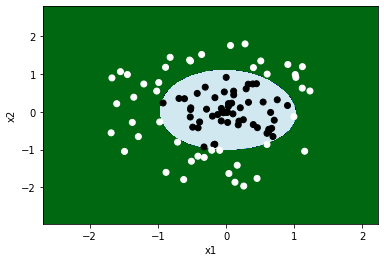

In [16]:
clf = sklearn.svm.SVC(kernel="rbf", gamma="auto").fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

mlutils.plot_decision_boundary(lambda x: clf.predict(x), X_test.T, y_test.T)